## Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.4.1


## Loading Data

In [2]:
data = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print("Training: ", x_train.shape, y_train.shape)
print("Testing: ",x_test.shape, y_test.shape)

Training:  (60000, 28, 28) (60000,)
Testing:  (10000, 28, 28) (10000,)


## Data Preprocessing

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
import numpy as np
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Target variable is a multi class variable, therefore we need to convert it to onehotencoded

In [6]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [7]:
import matplotlib.pyplot as plt

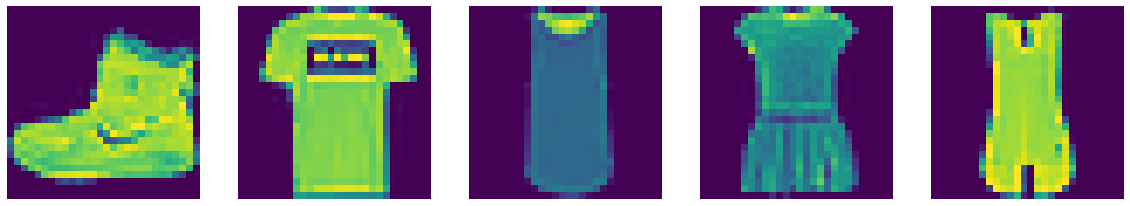

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(x_train[i])
    ax[i].axis('off')

In [13]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [16]:
x_test.shape

(10000, 784)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [17]:
model_0 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

### Model compilation

In [18]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [19]:
# Training the model. 
training = model_0.fit(x_train, y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.3890 - accuracy: 0.5542 - val_loss: 0.7553 - val_accuracy: 0.7642
Epoch 2/70
750/750 [==============================] - 1s 2ms/step - loss: 0.7354 - accuracy: 0.7671 - val_loss: 0.6527 - val_accuracy: 0.7903
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6469 - accuracy: 0.7924 - val_loss: 0.6060 - val_accuracy: 0.7995
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5999 - accuracy: 0.8080 - val_loss: 0.5782 - val_accuracy: 0.8069
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5709 - accuracy: 0.8147 - val_loss: 0.5583 - val_accuracy: 0.8123
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.8201 - val_loss: 0.5420 - val_accuracy: 0.8167
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.8228 - val_loss: 0.5310 - val_accuracy: 0.8207
Epoch 

### Plot accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


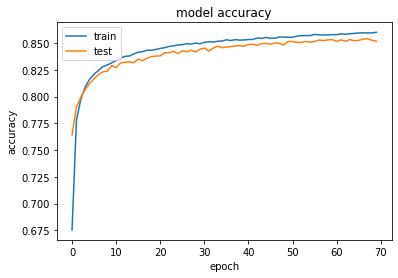

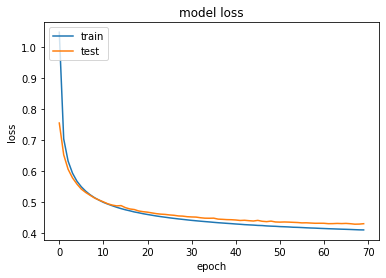

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [21]:
# evaluate the model
test_loss, test_acc = model_0.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.8411
Test accuracy: 0.8410999774932861


**With Single layer perceptron, we got 84.1% accuracy**

## Multi Layer Perceptron (Model 1) : Adding a hidden layer

In [22]:
model_1 = Sequential()

# Hidden layer - 1
model_1.add(Dense(128, input_shape=(784,), name='hidden_layer', activation='relu'))

# Output Layer
model_1.add(Dense(10, activation='softmax'))

### Model compilation

In [23]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 128)               100480    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [24]:
# Training the model. 
training_1 = model_1.fit(x_train, y_train, batch_size=64, epochs=40, validation_split=0.2) 

Epoch 1/40
750/750 [==============================] - 2s 2ms/step - loss: 1.2722 - accuracy: 0.6114 - val_loss: 0.6790 - val_accuracy: 0.7773
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.6481 - accuracy: 0.7917 - val_loss: 0.5722 - val_accuracy: 0.8057
Epoch 3/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.8166 - val_loss: 0.5253 - val_accuracy: 0.8207
Epoch 4/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5227 - accuracy: 0.8245 - val_loss: 0.4984 - val_accuracy: 0.8286
Epoch 5/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4931 - accuracy: 0.8340 - val_loss: 0.4785 - val_accuracy: 0.8359
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4710 - accuracy: 0.8398 - val_loss: 0.4717 - val_accuracy: 0.8372
Epoch 7/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4601 - accuracy: 0.8440 - val_loss: 0.4548 - val_accuracy: 0.8428
Epoch 

### Plotting accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


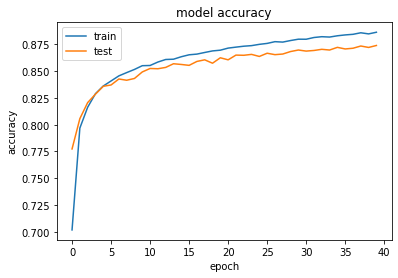

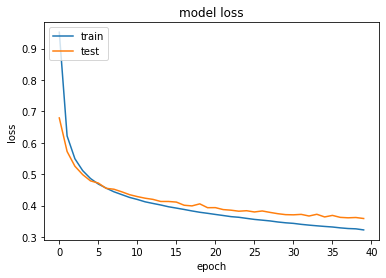

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training_1.history.keys())

# summarize training for accuracy
plt.plot(training_1.history['accuracy'])
plt.plot(training_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training_1.history['loss'])
plt.plot(training_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [27]:
# evaluate the model
test_loss, test_acc = model_1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3843 - accuracy: 0.8650
Test accuracy: 0.8650000095367432


**With this multi-layer perceptron we obtained 86.5% accuracy which is better than a Single layer perceptron**

## MLP (Model 2) : Adding a dropout (to prevent overfitting)

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model_2 = Sequential()

# Hidden layer - 1
model_2.add(Dense(128, input_shape=(784,), name='hidden_layer', activation='relu'))
model_2.add(Dropout(0.3))

# Output Layer
model_2.add(Dense(10, activation='softmax'))

In [31]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [32]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training

In [33]:
# Training the model. 
training_2 = model_2.fit(x_train, y_train, batch_size=64, epochs=40, validation_split=0.2) 

Epoch 1/40
750/750 [==============================] - 2s 2ms/step - loss: 1.3719 - accuracy: 0.5375 - val_loss: 0.6991 - val_accuracy: 0.7711
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.7390 - accuracy: 0.7532 - val_loss: 0.5979 - val_accuracy: 0.8047
Epoch 3/40
750/750 [==============================] - 2s 2ms/step - loss: 0.6354 - accuracy: 0.7868 - val_loss: 0.5487 - val_accuracy: 0.8177
Epoch 4/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5916 - accuracy: 0.7981 - val_loss: 0.5183 - val_accuracy: 0.8235
Epoch 5/40
750/750 [==============================] - 2s 3ms/step - loss: 0.5604 - accuracy: 0.8100 - val_loss: 0.4977 - val_accuracy: 0.8292
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5287 - accuracy: 0.8190 - val_loss: 0.4831 - val_accuracy: 0.8332
Epoch 7/40
750/750 [==============================] - 2s 3ms/step - loss: 0.5094 - accuracy: 0.8277 - val_loss: 0.4680 - val_accuracy: 0.8364
Epoch 

### Plotting accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


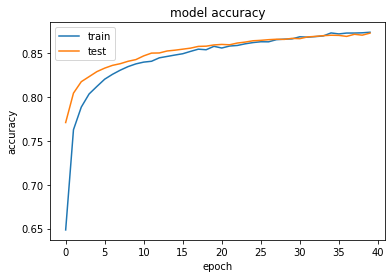

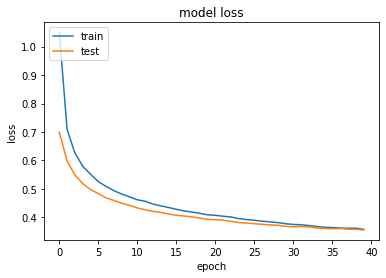

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training_2.history.keys())

# summarize training for accuracy
plt.plot(training_2.history['accuracy'])
plt.plot(training_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training_2.history['loss'])
plt.plot(training_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [35]:
# evaluate the model
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8646
Test accuracy: 0.8646000027656555


**The model overfitting is avoided as 30% of Neurons in the hidden layer are dropped at random and the accuracy from model_1 and model_2 are approximately the same**

## MLP (Model 3) : Adding neurons to the hidden layer

In [51]:
model_3 = Sequential()

# Hidden layer - 1
model_3.add(Dense(256, input_shape=(784,), name='hidden_layer1', activation='relu'))
model_3.add(Dropout(0.3))

# Output Layer
model_3.add(Dense(10, activation='softmax'))

In [52]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [53]:
# Compiling the model.
model_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training

In [54]:
# Training the model. 
training_3 = model_3.fit(x_train, y_train, batch_size=64, epochs=40, validation_split=0.2) 

Epoch 1/40
750/750 [==============================] - 2s 2ms/step - loss: 1.2942 - accuracy: 0.5636 - val_loss: 0.6752 - val_accuracy: 0.7759
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.6953 - accuracy: 0.7620 - val_loss: 0.5833 - val_accuracy: 0.8023
Epoch 3/40
750/750 [==============================] - 2s 2ms/step - loss: 0.6034 - accuracy: 0.7969 - val_loss: 0.5334 - val_accuracy: 0.8206
Epoch 4/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5599 - accuracy: 0.8110 - val_loss: 0.5066 - val_accuracy: 0.8268
Epoch 5/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5259 - accuracy: 0.8182 - val_loss: 0.4859 - val_accuracy: 0.8329
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5086 - accuracy: 0.8269 - val_loss: 0.4689 - val_accuracy: 0.8382
Epoch 7/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4880 - accuracy: 0.8310 - val_loss: 0.4638 - val_accuracy: 0.8393
Epoch 

### Plotting accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


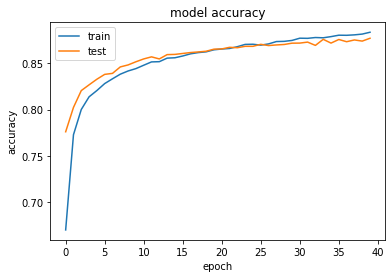

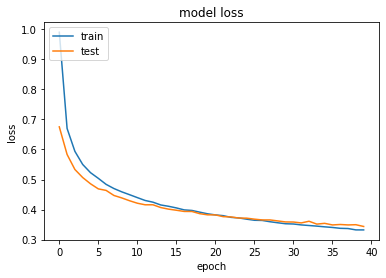

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training_3.history.keys())

# summarize training for accuracy
plt.plot(training_3.history['accuracy'])
plt.plot(training_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training_3.history['loss'])
plt.plot(training_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [56]:
# evaluate the model
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8686
Test accuracy: 0.8686000108718872


**The model accuracy is improved by 0.4% after adding one more hidden layer**

In [67]:
model_4 = Sequential()

# Hidden layer - 1
model_4.add(Dense(256, input_shape=(784,), name='hidden_layer1', activation='relu'))
model_4.add(Dropout(0.3))

# Output Layer
model_4.add(Dense(10, activation='softmax'))

### Model Compilation

In [68]:
# Compiling the model.
model_4.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training

In [69]:
# Training the model. 
training_4 = model_4.fit(x_train, y_train, batch_size=64, epochs=40, validation_split=0.2) 

Epoch 1/40
750/750 [==============================] - 2s 3ms/step - loss: 0.7257 - accuracy: 0.7468 - val_loss: 0.4442 - val_accuracy: 0.8382
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4270 - accuracy: 0.8457 - val_loss: 0.3960 - val_accuracy: 0.8593
Epoch 3/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3834 - accuracy: 0.8620 - val_loss: 0.3685 - val_accuracy: 0.8626
Epoch 4/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3557 - accuracy: 0.8707 - val_loss: 0.3480 - val_accuracy: 0.8735
Epoch 5/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3418 - accuracy: 0.8737 - val_loss: 0.3292 - val_accuracy: 0.8794
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3237 - accuracy: 0.8794 - val_loss: 0.3392 - val_accuracy: 0.8770
Epoch 7/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3182 - accuracy: 0.8813 - val_loss: 0.3297 - val_accuracy: 0.8820
Epoch 

### Plotting accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


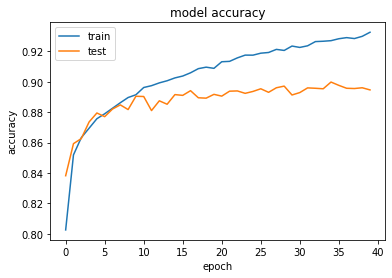

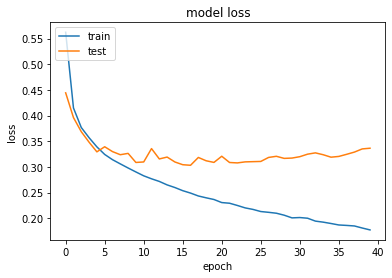

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training_4.history.keys())

# summarize training for accuracy
plt.plot(training_4.history['accuracy'])
plt.plot(training_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training_4.history['loss'])
plt.plot(training_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [71]:
# evaluate the model
test_loss, test_acc = model_4.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.8928
Test accuracy: 0.892799973487854


In [72]:
(0.8686000108718872 - 0.892799973487854) * 100

-2.4199962615966797

**The model accuracy is improved by 2.4% after changing the optimizer to ADAM but it looks like the model started overfitting**

In [80]:
model_5 = Sequential()

# Hidden layer - 1
model_5.add(Dense(256, input_shape=(784,), name='hidden_layer1', activation='relu'))
model_5.add(Dropout(0.3))

# Hidden layer - 2
model_5.add(Dense(256, input_shape=(784,), name='hidden_layer2', activation='relu'))
model_5.add(Dropout(0.3))

# Output Layer
model_5.add(Dense(10, activation='softmax'))

In [81]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [82]:
# Compiling the model.
model_5.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training

In [83]:
# Training the model. 
training_5 = model_5.fit(x_train, y_train, batch_size=64, epochs=40, validation_split=0.2) 

Epoch 1/40
750/750 [==============================] - 2s 3ms/step - loss: 0.7826 - accuracy: 0.7194 - val_loss: 0.4185 - val_accuracy: 0.8378
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4414 - accuracy: 0.8394 - val_loss: 0.3942 - val_accuracy: 0.8539
Epoch 3/40
750/750 [==============================] - 2s 3ms/step - loss: 0.4058 - accuracy: 0.8542 - val_loss: 0.3660 - val_accuracy: 0.8648
Epoch 4/40
750/750 [==============================] - 2s 3ms/step - loss: 0.3778 - accuracy: 0.8596 - val_loss: 0.3469 - val_accuracy: 0.8732
Epoch 5/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3593 - accuracy: 0.8676 - val_loss: 0.3377 - val_accuracy: 0.8763
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3389 - accuracy: 0.8739 - val_loss: 0.3529 - val_accuracy: 0.8687
Epoch 7/40
750/750 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.8779 - val_loss: 0.3203 - val_accuracy: 0.8838
Epoch 

### Plotting Accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


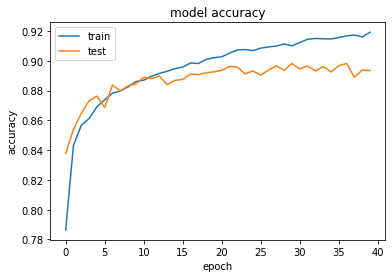

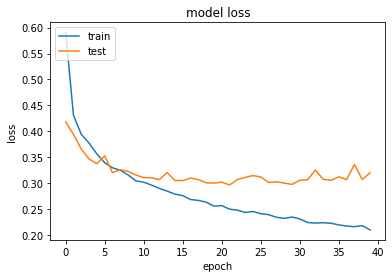

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training_5.history.keys())

# summarize training for accuracy
plt.plot(training_5.history['accuracy'])
plt.plot(training_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training_5.history['loss'])
plt.plot(training_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [85]:
# evaluate the model
test_loss, test_acc = model_5.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8897
Test accuracy: 0.8896999955177307


In [86]:
(0.892799973487854 - 0.8896999955177307) * 100

0.3099977970123291

**Adding more hidden layers has *reduced* the accuracy by 0.3%**

In [87]:
model_6 = Sequential()

# Hidden layer - 1
model_6.add(Dense(256, input_shape=(784,), name='hidden_layer1', activation='relu'))
model_6.add(Dropout(0.3))

# Output Layer
model_6.add(Dense(10, activation='softmax'))

### Model Compilation

In [88]:
# Compiling the model.
model_6.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training

In [89]:
# Training the model. 
training_6 = model_6.fit(x_train, y_train, batch_size=32, epochs=60, validation_split=0.2) 

Epoch 1/60
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1104 - accuracy: 0.6342 - val_loss: 0.5797 - val_accuracy: 0.8072
Epoch 2/60
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5848 - accuracy: 0.8054 - val_loss: 0.5066 - val_accuracy: 0.8265
Epoch 3/60
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5269 - accuracy: 0.8217 - val_loss: 0.4713 - val_accuracy: 0.8357
Epoch 4/60
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4803 - accuracy: 0.8337 - val_loss: 0.4513 - val_accuracy: 0.8431
Epoch 5/60
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4666 - accuracy: 0.8389 - val_loss: 0.4286 - val_accuracy: 0.8497
Epoch 6/60
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4426 - accuracy: 0.8477 - val_loss: 0.4177 - val_accuracy: 0.8522
Epoch 7/60
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4357 - accuracy: 0.8479 - val_loss: 0.4089 - val_accuracy:

### Plotting Accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


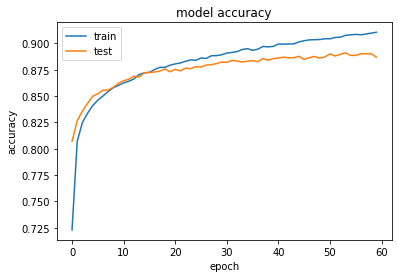

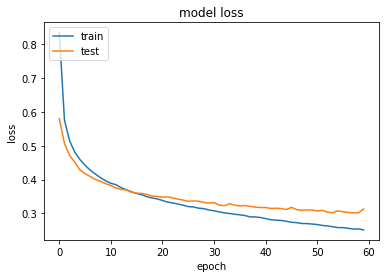

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training_6.history.keys())

# summarize training for accuracy
plt.plot(training_6.history['accuracy'])
plt.plot(training_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training_6.history['loss'])
plt.plot(training_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on the test dataset

In [91]:
# evaluate the model
test_loss, test_acc = model_6.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8799
Test accuracy: 0.8798999786376953


In [92]:
(0.8798999786376953 - 0.8896999955177307) * 100

-0.98000168800354